<h1 align = "center">Genre Classification by Lyric Analysis</h1>
<h2 align = "center">Data mining Project</h2>
<h4 align = "center">
    
    Nathan Jenkins
    Vincent Potrykus
    Jordan Sandberg
</h4>

<h2>Introduction</h2>
<p>
Online streaming platforms like Apple Music and Spotify add new songs to their collection daily. Each platform gives users the ability to listen to and download millions unique of songs. These songs are catalogued and categorized so that music listeners may find new songs that match their unique tastes. 

Organizing songs by genre is an old and familiar technique to categorize music and make it easier for listeners to find songs they like. To classify songs into genres manually, someone would need to listen to it and select the genre that best applies. This is hard and very time-consuming job. They would require a knowledge of ,many different genres, types of music and the nuances between them. 

Machine learning and text lyric analysis can aid in this pursuit. 
</p>

<p>
This report serves to identify if there is a link between word frequency within the lyrics of a song and genre that the song belongs to. The notebook will analyses the effectiveness of different machine learning techniques, algorithms and natural language processing tools to determine the correlation between lyrics and musical genres. 

</p>

<h2>The Dataset</h2>
<p>The dataset can be obtained from kaggle at the following <a href = "https://www.kaggle.com/gyani95/380000-lyrics-from-metrolyrics/data">link. </p>
<p><font color = red>
<strong>IMPORTANT: Place the <i>lyrics.csv</i> file in the same folder as the <i>project.ipynb</i> file (thisfile)</strong></font></p>


In [1]:
# import the dataset
import pandas as pd
import numpy as np

data = pd.read_csv('lyrics.csv', index_col=0)

# show the format of the data
data.head()

,song,year,artist,genre,lyrics
index,,,,,
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


<p>This dataset contains 380,000 rows in the format <i>song/year/artist/genre/lyrics</i>/</p>
<p>Each song ranges from a number of genres, including: <b>Rock, Pop, Hip-Hop, Metal, Country, Jazz, Electronic, Indie, R&B, and Folk</b> For the context of this project, the columns of interest are <i>lyrics</i> the attributes, and <i>genre,</i> the target class. Where the lyrics will first need to be vectorized, where each word is a token and the frequency of occurrence related to their importance of classifying the song.</p>

In [2]:
# preprocess the data

# remove all the genres with not avaliable and other
data = data[data.genre != 'Not Available']
data = data[data.genre != 'Other']
data = data[data.genre != 'Folk']

# remove all the data with no lyrics
data.dropna(subset=['lyrics'], inplace=True)

# sample a smaller subset of data since it is quite large for processing
data = data.sample(n=10000, random_state=1)

<h2>Data Preprocessing</h2>
<h3>Removing unnecessary data</h3>

<p>The first step of the process is preprocessing the data so that we can use it in the algorithm. First, we remove all rows of non-importance from the collection, that is, rows where the genre is "Not Available" or "Other". Second, we delete all the rows that do not contain lyrics. In the next step, Count Vectorizer, we remove all "non-words", that is emojis and all tokens that are not composed solely of the letters of the alphabet, and "stop words", that is common words that are unlikely to be specific to a document, such as "and", "the", "a", etc.</p>


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords

# max_features : a maximum of 1500 columns
# min_df : the word must occur in a mininum of 5 documents
# max_df : the word occurs in less than 70 percent of the documents (words appearing in all are useless)
# nltk.download('stopwords')
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'), token_pattern = '[a-zA-Z]+')

# creates a bag of words
X = vectorizer.fit_transform(data.lyrics.values.astype('str'))

# creates y, which is our genre class
y = data.genre

# visualize the transformed data 
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names()).head()

,across,act,afraid,age,ago,ah,ahead,ai,aint,air,...,yesterday,yet,yo,york,young,youre,youth,yuh,z,zu
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h3>Count Vectorizer</h3>

This step converts the initial document to a vector of tokens. Where each token is the amount of times the word appears in the document.
<h4>Important metrics to consider</h4>

1. Max features: The maximum number of words to consider as attributes
2. min_df : The minimum number of documents the word must appear in to be considered.
       - if a word appears in very few song lyrics then this word has little affect on determining the class
3. max_df : The word appears in a maximum of this many documents. 
       - if a word appears in too many documents then it has no affect on determine the class
       

In [4]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X)

# notice how the data is now altered based on the word frequency
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names()).head()

,across,act,afraid,age,ago,ah,ahead,ai,aint,air,...,yesterday,yet,yo,york,young,youre,youth,yuh,z,zu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.052699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h3>TF-IDF Vectorizer</h3>
<p><a href = "http://www.tfidf.com"> "Term frequency inverse document"</a>is a more sophisticated method of vectorization. Each word is assigned a weight from 0 to 1 that is a measure of the words importance to collection of documents. That is, this metric is proportional to the amount of times the word appears in the document, offset by the amount of times the word appears in the entirety of the collection</p>
<p>The metric TFIDF is calculated by: $TFIDF = TF * IDF$
</p>

$$TF(t) = \frac{\text{number of times term t appears in the document}}{\text {total number of terms in the document}}$$

$$IDF(t) = \ln{\left( \frac{\text{Total number of documents}}{\text{Number of documents with term t}}\right) }$$

<p>If all the document contains the term t, this term will have a score of 0. Since $TF * ln(1) = 0$</p>
<p>If the term t is rare, then IDF will be larger. Then TF-IDF will be larger</p>




In [5]:
y.value_counts().plot(kind='bar')

<h3>Imbalanced Data</h3>
<p>This graph shows us that the dataset has some very imbalanced data. There is a disproportionate amount of rock songs than others. With this dataset, if an algorithm guessed rock 100% of the time, it would achieve around 50% accuracy for this class. </p>

<p>To address the issue of imbalanced data, we are going to oversample the data from the under represented classes.</p>

<p><code>imblearn.oversampling.RandomOverSampler</code> does this by picking random samples with replacement</p>

In [6]:
# split X and y into training a test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

<p>Split the data into training and testing using <code>train_test_splot</code> from <code>sklearn</code></p>


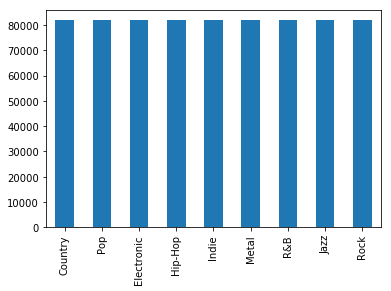

In [7]:
from imblearn.over_sampling import RandomOverSampler

X_train_oversampled, y_train_oversampled = RandomOverSampler().fit_resample(X_train, y_train)
pd.DataFrame(y_train_oversampled)[0].value_counts().plot(kind='bar')

<p>By employing the sampling techniques, each class now has an equivalent amount of rows that can be used to train the algorithms. It is important that these rows are only used for training, and the algorithms are evaluated on the unbiased data, since the unbiased data is more representational of the population, and real world analyses.</p>

<h2>Experiment and Analysis</h2>
<p>The following algorithms will be evaluated to in their ability to classify the data</p>
1. Random Forest Classifier
2. Multinomial Bayes
3. Logistic Regression

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

# ignore the warnings
import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"

classifers = [RandomForestClassifier(), MultinomialNB(), LogisticRegression()]

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
def train_predict(classifiers, X_train=X_train, y_train=y_train):

    for classifier in classifiers:
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        print(classifier.__class__.__name__, accuracy_score(y_test, y_pred))
        print(classification_report(y_test, y_pred))

<p>Lets first compare how successful training with the unbiased vs the sampled bias data is with multinomial bayes to see if sampling the data made a difference</p>

In [10]:

train_predict([MultinomialNB()], X_train = X_train_oversampled, y_train = y_train_oversampled)
train_predict([MultinomialNB()])

MultinomialNB 0.29576841962038236
              precision    recall  f1-score   support

     Country       0.22      0.57      0.32      3626
  Electronic       0.09      0.22      0.13      1972
     Hip-Hop       0.61      0.71      0.65      6271
       Indie       0.04      0.34      0.07       785
        Jazz       0.19      0.36      0.25      1940
       Metal       0.44      0.67      0.53      5973
         Pop       0.39      0.17      0.24     10068
         R&B       0.04      0.42      0.07       829
        Rock       0.71      0.13      0.21     27332

    accuracy                           0.30     58796
   macro avg       0.30      0.40      0.28     58796
weighted avg       0.53      0.30      0.30     58796

MultinomialNB 0.5592727396421525


/Users/nathanjenkins/opt/anaconda3/envs/mining/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/nathanjenkins/opt/anaconda3/envs/mining/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

     Country       0.73      0.00      0.01      3626
  Electronic       0.13      0.00      0.00      1972
     Hip-Hop       0.79      0.65      0.71      6271
       Indie       0.00      0.00      0.00       785
        Jazz       0.50      0.00      0.00      1940
       Metal       0.73      0.36      0.48      5973
         Pop       0.42      0.14      0.21     10068
         R&B       0.00      0.00      0.00       829
        Rock       0.53      0.92      0.68     27332

    accuracy                           0.56     58796
   macro avg       0.43      0.23      0.23     58796
weighted avg       0.54      0.56      0.48     58796



/Users/nathanjenkins/opt/anaconda3/envs/mining/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
